In [22]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
# Load data
data = pd.read_csv("C:/Users/navee/Desktop/sikandar/FYP/Skin Care/model/RGB_Dermnet.csv")

In [24]:
'''# Define class names
classes = {
    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage; Vascular Tumor'),
    6: ('mel', 'melanoma'),
    7: ('Hives', 'Urticaria'),
    8: ('Scabies', 'Lyme Disease and other Infestations and Bites'),
    9: ('Bullous Pemphigoid', ''),
    10: ('acne', 'Rosacea'),
    11: ('Vasculitis', ''),
    12: ('Pigmentation Disorder', ''),
    13: ('STDs', 'Herpes/AIDS')
}

'''


"# Define class names\nclasses = {\n    0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),\n    1: ('bcc', 'basal cell carcinoma'),\n    2: ('bkl', 'benign keratosis-like lesions'),\n    3: ('df', 'dermatofibroma'),\n    4: ('nv', 'melanocytic nevi'),\n    5: ('vasc', 'pyogenic granulomas and hemorrhage'),\n    6: ('mel', 'melanoma'),\n    7: ('Hives', 'Urticaria'),\n    8: ('Scabies', 'Lyme Disease and other Infestations and Bites'),\n    9: ('Bullous Pemphigoid', ''),\n    10: ('Nail Fungus', ''),\n    11: ('acne', 'Rosacea'),\n    12: ('Vascular Tumor', ''),\n    13: ('Vasculitis', ''),\n    14: ('Pigmentation Disorder', ''),\n    15: ('STDs', 'Herpes/AIDS')\n}\n"

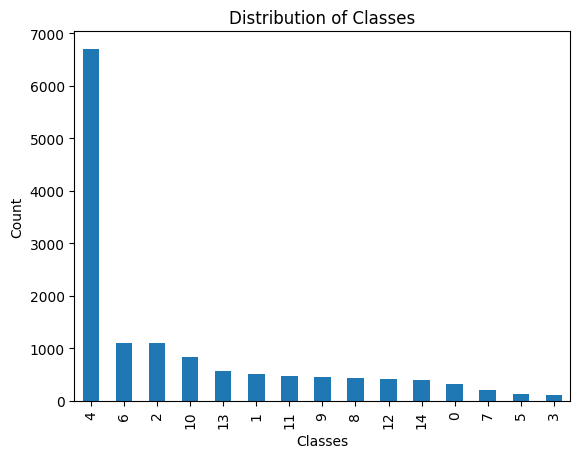

In [25]:
# EDA
distribution = data['label'].value_counts()
distribution.plot.bar()
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

In [26]:
# Fix data imbalance
sampler = RandomOverSampler()
XData, yData = sampler.fit_resample(data.drop(columns=['label']), data['label'])

In [27]:
# Reshape data
XData = np.array(XData).reshape((-1, 28, 28, 3))
XData = XData / 255

In [28]:
# Create train and validation sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(XData, yData, test_size=0.2)

In [29]:
# Define model
img_width, img_height = 28, 28
input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('swish'))
model.add(Dropout(0.5))
model.add(Dense(15))  # Updated to match the number of classes
model.add(Activation('softmax'))

In [30]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [31]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='dermnet_m1.h5',
                                               monitor='val_acc', mode='max',
                                               verbose=1)

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

: 

In [33]:
# Train the model
history = model.fit(Xtrain,
                    Ytrain,
                    epochs=100,
                    validation_data=(Xtest, Ytest),
                    callbacks=[callback, early_stopping])

Epoch 1/100
2515/2515 [==============================] - ETA: 0s - loss: 1.9291 - accuracy: 0.3104
Epoch 1: saving model to dermnet_m1.h5
2515/2515 [==============================] - 76s 29ms/step - loss: 1.9291 - accuracy: 0.3104 - val_loss: 1.5784 - val_accuracy: 0.4343
Epoch 2/100
   1/2515 [..............................] - ETA: 1:03 - loss: 1.7184 - accuracy: 0.3438

c:\Users\navee\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2514/2515 [============================>.] - ETA: 0s - loss: 1.5708 - accuracy: 0.4290
Epoch 2: saving model to dermnet_m1.h5
2515/2515 [==============================] - 65s 26ms/step - loss: 1.5707 - accuracy: 0.4290 - val_loss: 1.3797 - val_accuracy: 0.5064
Epoch 3/100
2515/2515 [==============================] - ETA: 0s - loss: 1.4037 - accuracy: 0.4848
Epoch 3: saving model to dermnet_m1.h5
2515/2515 [==============================] - 70s 28ms/step - loss: 1.4037 - accuracy: 0.4848 - val_loss: 1.2172 - val_accuracy: 0.5615
Epoch 4/100
2513/2515 [============================>.] - ETA: 0s - loss: 1.2855 - accuracy: 0.5261
Epoch 4: saving model to dermnet_m1.h5
2515/2515 [==============================] - 69s 28ms/step - loss: 1.2856 - accuracy: 0.5261 - val_loss: 1.0891 - val_accuracy: 0.6109
Epoch 5/100
2513/2515 [============================>.] - ETA: 0s - loss: 1.1823 - accuracy: 0.5640
Epoch 5: saving model to dermnet_m1.h5
2515/2515 [==============================] - 71s 28ms/s

In [ ]:
# Evaluate the model
model.evaluate(Xtrain, Ytrain)
model.evaluate(Xtest, Ytest)

671/671 [==============================] - 7s 11ms/step - loss: 0.1018 - accuracy: 0.9665


[0.10177399218082428, 0.9664895534515381]

In [ ]:
# Plot loss over epochs
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

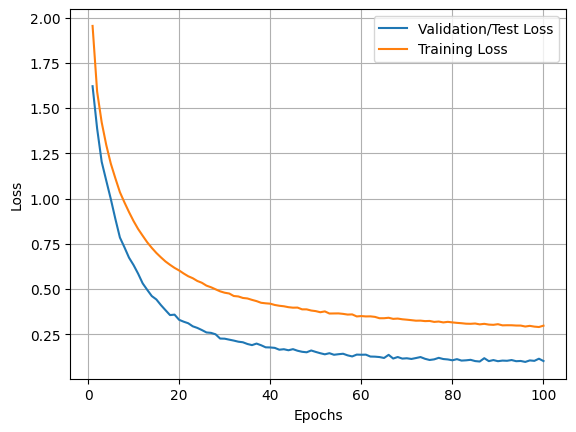

In [ ]:
plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Plot accuracy over epochs
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

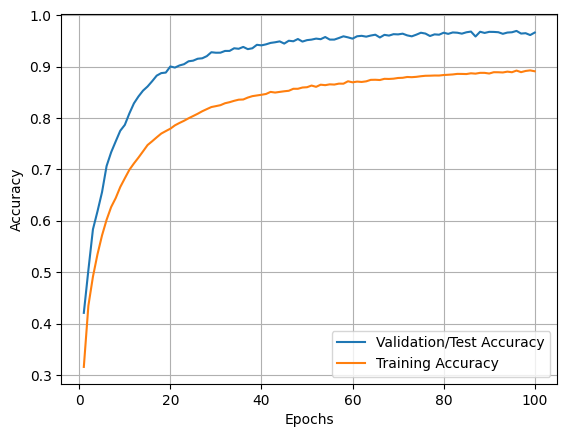

In [ ]:
plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
plt.plot(epochs, acc_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(Xtrain, Ytrain)
test_loss, test_accuracy = model.evaluate(Xtest, Ytest)

671/671 [==============================] - 7s 11ms/step - loss: 0.1018 - accuracy: 0.9665


In [ ]:
# Predictions
y_pred_train_probs = model.predict(Xtrain)
y_pred_test_probs = model.predict(Xtest)

671/671 [==============================] - 7s 11ms/step


In [ ]:
# Convert probabilities to class labels
y_pred_train = np.argmax(y_pred_train_probs, axis=1)
y_pred_test = np.argmax(y_pred_test_probs, axis=1)

In [ ]:
# Calculate F1-score
train_f1 = f1_score(Ytrain, y_pred_train, average='macro')
test_f1 = f1_score(Ytest, y_pred_test, average='macro')

In [ ]:
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Train F1-score:", train_f1)

Train Loss: 0.0754416286945343
Train Accuracy: 0.9766032695770264
Train F1-score: 0.9762426014398596


In [ ]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test F1-score:", test_f1)

Test Loss: 0.10177399218082428
Test Accuracy: 0.9664895534515381
Test F1-score: 0.9657811720074629
